# Understanding the Bellman Equation in Reinforcement Learning

This notebook explains the Bellman equation and its fundamental role in Reinforcement Learning (RL). We'll cover:
1. What is the Bellman equation?
2. How it relates to value functions in RL
3. Practical examples with simple environments

## 1. The Bellman Equation

The Bellman equation, named after Richard Bellman, is a fundamental equation in RL that expresses the relationship between the value of a state and the values of its successor states. In simple terms, it states that the value of your current state is the reward you expect to get immediately plus the discounted value of the future state you expect to be in.

Mathematically, it's expressed as:

V(s) = R(s) + γ * max[V(s')]

Where:
- V(s) is the value of state s
- R(s) is the immediate reward in state s
- γ (gamma) is the discount factor (0 ≤ γ ≤ 1)
- V(s') is the value of the next state

## 2. Simple Grid World Example

Let's create a simple grid world to understand how the Bellman equation works in practice.

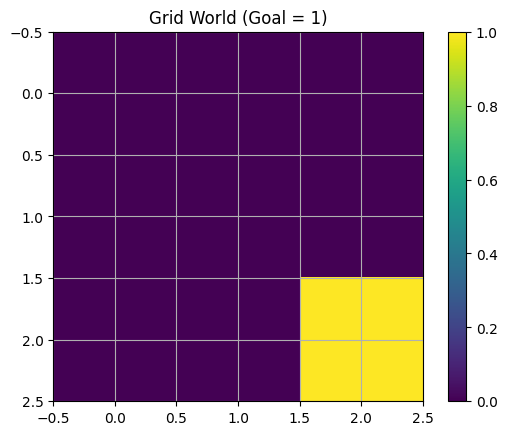

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 3x3 grid world
class GridWorld:
    def __init__(self):
        self.grid_size = 3
        self.grid = np.zeros((self.grid_size, self.grid_size))
        # Set goal state (bottom-right corner)
        self.goal = (2, 2)
        self.grid[self.goal] = 1
        
    def get_reward(self, state):
        if state == self.goal:
            return 1
        return 0
    
    def get_valid_actions(self, state):
        valid_actions = []
        x, y = state
        # Check all possible moves (up, right, down, left)
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.grid_size and 0 <= new_y < self.grid_size:
                valid_actions.append((dx, dy))
        return valid_actions

# Create and display the grid world
env = GridWorld()
plt.imshow(env.grid)
plt.grid(True)
plt.title('Grid World (Goal = 1)')
plt.colorbar()
plt.show()

## 3. Value Iteration using Bellman Equation

Now, let's implement value iteration using the Bellman equation to find the optimal value function for our grid world.

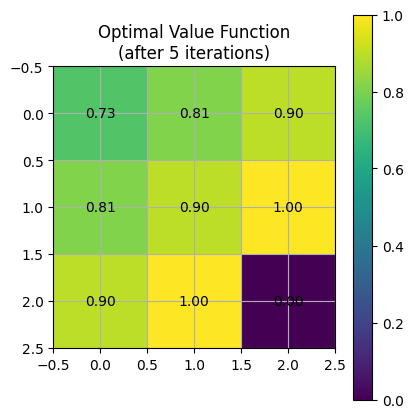

In [2]:
def value_iteration(env, gamma=0.9, theta=0.001):
    # Initialize value function
    V = np.zeros((env.grid_size, env.grid_size))
    iteration = 0
    
    while True:
        delta = 0
        iteration += 1
        # Update each state
        for i in range(env.grid_size):
            for j in range(env.grid_size):
                if (i, j) == env.goal:
                    continue
                    
                v = V[i, j]
                # Get maximum value among all possible actions
                max_value = float('-inf')
                
                for action in env.get_valid_actions((i, j)):
                    next_i, next_j = i + action[0], j + action[1]
                    # Bellman equation
                    value = env.get_reward((next_i, next_j)) + gamma * V[next_i, next_j]
                    max_value = max(max_value, value)
                
                V[i, j] = max_value
                delta = max(delta, abs(v - V[i, j]))
        
        # Check convergence
        if delta < theta:
            break
    
    return V, iteration

# Run value iteration
optimal_values, num_iterations = value_iteration(env)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(optimal_values)
plt.colorbar()
plt.title(f'Optimal Value Function\n(after {num_iterations} iterations)')
for i in range(env.grid_size):
    for j in range(env.grid_size):
        plt.text(j, i, f'{optimal_values[i,j]:.2f}', 
                 horizontalalignment='center',
                 verticalalignment='center')
plt.grid(True)

plt.show()

## 4. Understanding the Results

Let's break down what we've learned:

1. The value function shows the expected cumulative reward from each state.
2. States closer to the goal have higher values due to the discount factor (γ).
3. The Bellman equation helped us iteratively compute these values.

## 5. Q-Learning Example

Now let's implement Q-learning, which uses a variant of the Bellman equation for action-values (Q-values).

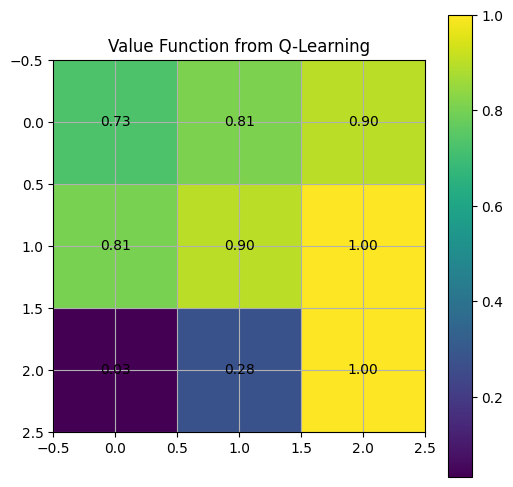

In [4]:
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    # Initialize Q-table
    Q = {}
    for i in range(env.grid_size):
        for j in range(env.grid_size):
            Q[(i,j)] = {action: 0 for action in env.get_valid_actions((i,j))}
    
    # Training loop
    for episode in range(episodes):
        state = (0, 0)  # Start state
        
        while state != env.goal:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                valid_actions = env.get_valid_actions(state)
                action = valid_actions[np.random.choice(len(valid_actions))]
            else:
                action = max(Q[state].items(), key=lambda x: x[1])[0]
            
            # Take action
            next_state = (state[0] + action[0], state[1] + action[1])
            reward = env.get_reward(next_state)
            
            # Q-learning update (Bellman equation)
            old_value = Q[state][action]
            next_max = max(Q[next_state].values()) if next_state != env.goal else 0
            
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            Q[state][action] = new_value
            
            state = next_state
    
    return Q

# Run Q-learning
Q_table = q_learning(env)

# Convert Q-table to value function for visualization
V_from_Q = np.zeros((env.grid_size, env.grid_size))
for i in range(env.grid_size):
    for j in range(env.grid_size):
        if (i,j) == env.goal:
            V_from_Q[i,j] = 1
        else:
            V_from_Q[i,j] = max(Q_table[(i,j)].values())

# Display results
plt.figure(figsize=(6, 6))
plt.imshow(V_from_Q)
plt.colorbar()
plt.title('Value Function from Q-Learning')
for i in range(env.grid_size):
    for j in range(env.grid_size):
        plt.text(j, i, f'{V_from_Q[i,j]:.2f}', 
                 horizontalalignment='center',
                 verticalalignment='center')
plt.grid(True)
plt.show()

## 6. Key Takeaways

1. The Bellman equation is the foundation for many RL algorithms:
   - Value Iteration uses it directly to compute optimal values
   - Q-learning uses a modified version for action-values

2. The equation captures two essential aspects of RL:
   - Immediate rewards (R(s))
   - Future value (γ * max[V(s')])

3. The discount factor (γ) balances:
   - Short-term vs. long-term rewards
   - Closer goals vs. distant goals

4. Both value iteration and Q-learning converge to optimal policies, but:
   - Value iteration requires a model of the environment
   - Q-learning learns from experience without a model

This tutorial demonstrated how the Bellman equation forms the theoretical foundation for practical RL algorithms, allowing agents to learn optimal behaviors through interaction with their environment.